<a href="https://colab.research.google.com/github/FrederikNiesner/NLP/blob/master/IMDB_with_multiple_Layer_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [2]:
# If the tf.__version__ is 1.x, please run this cell
!pip install tensorflow==2.0.0-beta0

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0906 13:53:31.575009 140098850989952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 237s 607ms/step - loss: 0.4460 - accuracy: 0.7790 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 206s 528ms/step - loss: 0.2192 - accuracy: 0.9178 - val_loss: 0.3090 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 206s 527ms/step - loss: 0.1691 - accuracy: 0.9382 - val_loss: 0.3611 - val_accuracy: 0.8710
Epoch 4/10
391/391 [==============================] - 205s 525ms/step - loss: 0.1407 - accuracy: 0.9480 - val_loss: 0.4222 - val_accuracy: 0.8638
Epoch 5/10
391/391 [==============================] - 205s 524ms/step - loss: 0.1288 - accuracy: 0.9506 - val_loss: 0.4273 - val_accuracy: 0.8627
Epoch 6/10
391/391 [==============================] - 205s 524ms/step - loss: 0.1158 - accuracy: 0.9558 - val_loss: 0.4840 - val_accuracy: 0.8632
Epoch 7/10
391/391 [==============================] - 205s 525ms/step - loss: 0.0901 - accuracy: 0.9682 - val_loss: 0.5525 - va

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

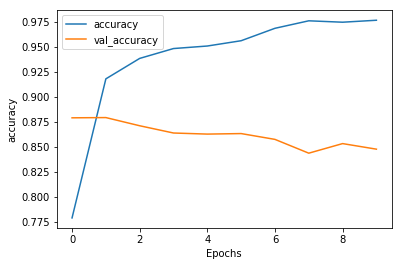

In [12]:
plot_graphs(history, 'accuracy')

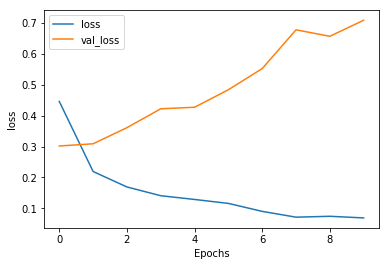

In [13]:
plot_graphs(history, 'loss')